In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
#Reading the Dataset
xls = pd.ExcelFile('HospitalDatabase .xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR = pd.read_excel(xls, 'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

# 1.Find the data type property and verify the data type of each column in the DataFrame of Providers table.

In [3]:
df_datatype = df_P
print(df_datatype)
result=df_P.dtypes 
print(result)

    ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff
0            1        Sally Sue        Pediatrics 1993-01-01 00:00:00.000
1            2       Mike Myers        Pediatrics 1993-05-02 00:00:17.695
2            3   Jordan Michael        Pediatrics 1993-06-24 21:31:46.687
3            4        Ted Texas        Pediatrics 1993-12-23 21:33:52.299
4            5         Ala Bama        Pediatrics 1995-01-10 02:53:47.838
5            6       Harry Kane        Pediatrics 1995-07-21 03:49:03.310
6            7        Barry Bar        Pediatrics 1995-11-21 19:30:38.759
7            8        Ted Green        Pediatrics 1996-05-30 06:14:52.539
8            9        Ted Black        Pediatrics 1997-02-20 08:01:10.211
9           10         Fred Man           Surgery 1998-03-17 01:47:18.794
10          11     Kim Kimberly           Surgery 1998-05-10 14:47:29.468
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762
12          13  Abigail Marriot       

# 2.First 10 rows of the Patient First name and Last name.

In [4]:
df_list=df_PA
df_patientFNLN = df_list[['FirstName','LastName']]
df_patientFNLN.head(10)

,FirstName,LastName
0,Lanni,Sue
1,Far,Myers
2,Devlin,Michael
3,Carmine,Texas
4,Tann,Bama
5,Jerrilyn,Kane
6,Skipton,Bar
7,Alexandra,Green
8,Devlin,Black
9,Granny,Man


# 3.find the Patient having Stomach Ache.

In [5]:
df_reason=df_EDU[['PatientID','ReasonForVisit']]
df_DETAILS=df_reason.loc[(df_EDU['ReasonForVisit'] == 'Stomach Ache')]
print(df_DETAILS)

     PatientID ReasonForVisit
0            1   Stomach Ache
2           13   Stomach Ache
43          11   Stomach Ache
45          23   Stomach Ache
66          90   Stomach Ache
..         ...            ...
929        909   Stomach Ache
934        923   Stomach Ache
936        925   Stomach Ache
937        926   Stomach Ache
938        927   Stomach Ache

[136 rows x 2 columns]


# 4.Find the list of unique Provider Specialty.

In [6]:
df_prvspec = df_P
df_prvspec['ProviderSpecialty'].unique()

array(['Pediatrics', 'Surgery', 'Cardiology', 'PrimaryCare'], dtype=object)

# 5. Access the record of specific patientID 377 & primary diagnosis is stroke.

In [7]:
df_record=df_RR
df_record[(df_record['PatientID']== 377) & 
          (df_record['PrimaryDiagnosis']=='Stroke')]


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
382,282,377,2018-01-31,2018-02-05 17:57:09.552,Home,Neurology,Stroke,13.820021,0.39269,1.0,4.0,1.0


# 6.find all the patient and visittype where BPS is greater than 185.

In [8]:
df_BPS=df_AV[['PatientMRN','BloodPressureSystolic','VisitType']]
df_BPS.loc[df_AV['BloodPressureSystolic']>185]
df_BPS

,PatientMRN,BloodPressureSystolic,VisitType
0,840,188.0,Physical
1,820,179.0,Follow Up
2,879,133.0,Telemedicine
3,884,132.0,Telemedicine
4,32,131.0,Telemedicine
...,...,...,...
945,873,187.0,Telemedicine
946,855,182.0,Follow Up
947,865,150.0,New
948,635,177.0,Physical


# 7.sort the admission date of patients in registry by descending order

In [9]:
df_adddate=df_RR
df_adate=df_adddate[['PatientID','AdmissionDate']]
df_adate.sort_values('AdmissionDate',ascending=False).head()

,PatientID,AdmissionDate
719,742,2018-02-22
708,731,2018-02-22
699,721,2018-02-22
700,722,2018-02-22
701,723,2018-02-22


# 8.find the total number of patients record in patient table.

In [10]:
df_total=df_PA
print('number of patients in record:',len(df_PA))



number of patients in record: 945


# 9.find the total number of patients to the Expired,Home,Transfer.

In [11]:
df_DDP=df_D
df_DDP.groupby('DischargeDisposition').count()[['PatientID']].reset_index()

,DischargeDisposition,PatientID
0,Expired,104
1,Home,577
2,Transfer,39


# 10.plot the graph for service to get the no of patients.

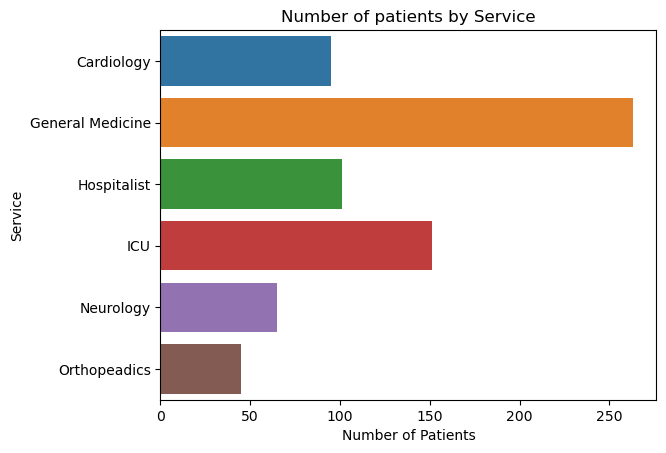

In [12]:
graph = df_D\
.groupby('Service')\
.count()[['PatientID']]\
.reset_index()
graph
figure = sns.barplot(data = graph,x = 'PatientID',y = 'Service')
plt.title('Number of patients by Service')
plt.xlabel('Number of Patients')
plt.ylabel('Service')
plt.show(figure)

# 11.find the patients visit type by month vise.
(hint:Add a new column that only has the date of visit month)

In [13]:
df_AV['DateofVisitMonth'] = df_AV['DateofVisit'].astype('datetime64[M]')
df_AV
df_visit=df_AV[['PatientMRN','DateofVisitMonth','DateofVisit']]
df_visit
visit_type_month = df_AV.groupby(['VisitType','DateofVisitMonth'])['PatientMRN'].count().reset_index(name='PatientMRNCount')
visit_type_month 

,VisitType,DateofVisitMonth,PatientMRNCount
0,Follow Up,2019-01-01,30
1,Follow Up,2019-02-01,90
2,Follow Up,2019-03-01,123
3,Follow Up,2019-04-01,81
4,Follow Up,2019-05-01,12
5,New,2019-01-01,39
6,New,2019-02-01,5
7,New,2019-03-01,16
8,New,2019-04-01,57
9,New,2019-05-01,8


# 12.plot line graph for count of patients born in a particular year gender wise.

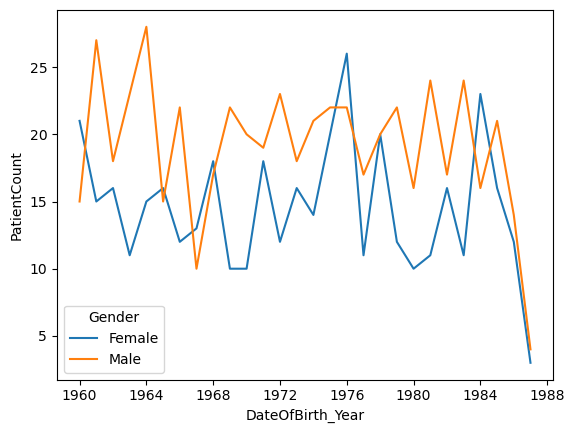

In [14]:
df_PA['DateOfBirth_Year'] = df_PA['DateOfBirth'].astype('datetime64[Y]')
df_PA
df_DOB=df_PA[['Gender','DateOfBirth_Year','PatientID']]
df_DOB

Birth_month = df_PA.groupby(['DateOfBirth_Year','Gender'])['PatientID'].count().reset_index(name='PatientCount')
Birth_month 

fig=sns.lineplot(data=Birth_month.reset_index(),
                 x='DateOfBirth_Year',
                 y='PatientCount',
                 hue='Gender')

# 13.How to get the shape of the data in ReAdmissionRegistry table.

In [15]:
df=pd.read_excel(xls, 'ReAdmissionRegistry')
df.shape

(720, 12)

# 14.write a code to count of empty values in each column of readmission registry table

In [16]:
df_null=df_RR
df_null.isna().sum()

AdmissionID                    0
PatientID                      0
AdmissionDate                  0
DischargeDate                  0
DischargeDisposition           0
Service                        0
PrimaryDiagnosis               0
ExpectedLOS                    0
ExpectedMortality              0
ReadmissionFlag              526
DaysToReadmission            526
EDVisitAfterDischargeFlag    379
dtype: int64

# 15. find a way to check for any null or missing values in patient table.

In [17]:
df_null=df_PA
df_null.isnull().values.any()

True

# 16.show some basic statistics for EDvisits. 

In [18]:
df_statistics=df_EDV
df_statistics.describe()


,EDVisitID,PatientID,Acuity
count,1199.000000,1199.000000,1199.000000
mean,600.000000,405.615513,2.326939
std,346.265794,279.829613,1.575014
min,1.000000,1.000000,1.000000
25%,300.500000,164.500000,1.000000
50%,600.000000,346.000000,2.000000
75%,899.500000,645.500000,4.000000
max,1199.000000,945.000000,5.000000


# 17.get a count of number of patients with a primary diagnosis.

In [19]:
df_primary =df_D
df_primary['PrimaryDiagnosis'].value_counts()


Pneumonia             177
Flu                    80
Heart Failure          78
Stroke                 68
Diabetes               64
Hypertension           50
AMI                    48
Laceration             29
Knee Replacement       23
Hip Fracture           23
Kidney Failure         20
Fever                  19
Migraine               12
Afib                   11
Broken Leg              9
Pain                    7
Spinal Cord Injury      2
Name: PrimaryDiagnosis, dtype: int64

# 18.find the correlation of BPS and BPD patients.

In [20]:
df_corr=df_AV
df_corre=df_corr[['BloodPressureSystolic','BloodPressureDiastolic']]
df_corre.corr()


,BloodPressureSystolic,BloodPressureDiastolic
BloodPressureSystolic,1.00000,0.86488
BloodPressureDiastolic,0.86488,1.00000


# 19.visualization the 18 question data

<AxesSubplot:>

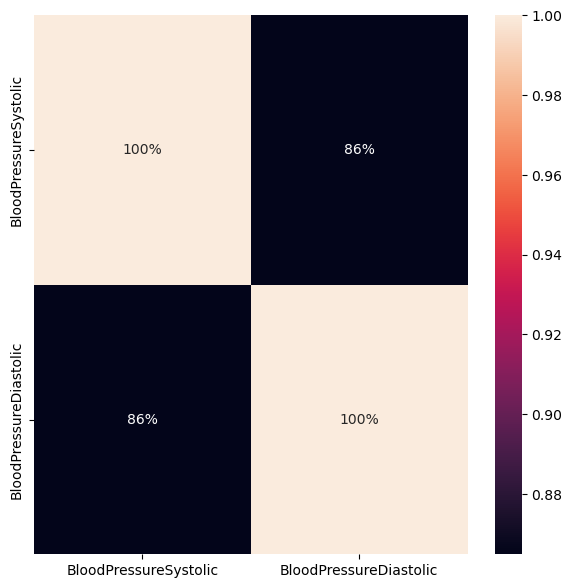

In [21]:
plt.figure(figsize=(7,7))
sns.heatmap(df_corre.corr(),annot=True,fmt='.0%')

# 20.plot the pie chart for the first 4 patients acuity and the reason for visit.

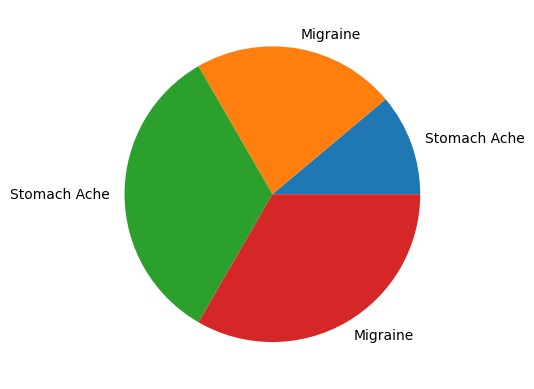

In [35]:
df_list=df_EDV
df_patientacuity= df_list[['Acuity','ReasonForVisit']]
df_patientacuity.head(4)
y=df_patientacuity.head(4)['Acuity']
my_labels =df_patientacuity.head(4)['ReasonForVisit']
plt.pie(y,labels=my_labels)
plt.show()

# 21.plot the 3D graph for first 10 patient BPS,BPD and pulse.

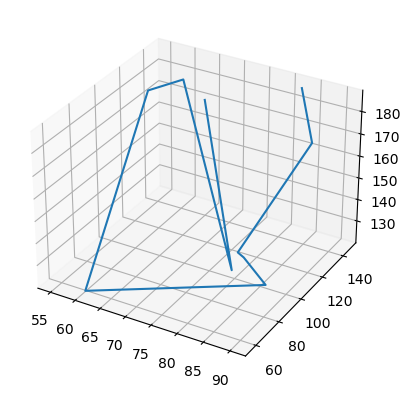

In [38]:
df_new=df_AV
df_3D= df_new[['BloodPressureSystolic','BloodPressureDiastolic','Pulse']]
df_3D.head(10)
x = df_3D.head(10)['BloodPressureSystolic']
y = df_3D.head(10)['BloodPressureDiastolic']
z = df_3D.head(10)['Pulse']
# Creating the figure object
fig = plt.figure()
# keeping the projection = 3d
# ctreates the 3d plot
ax = plt.axes(projection = '3d')
ax.plot3D(z, y, x)

# 22.plot the scatter chart for ExpectedLOS and ExpectedMortality.

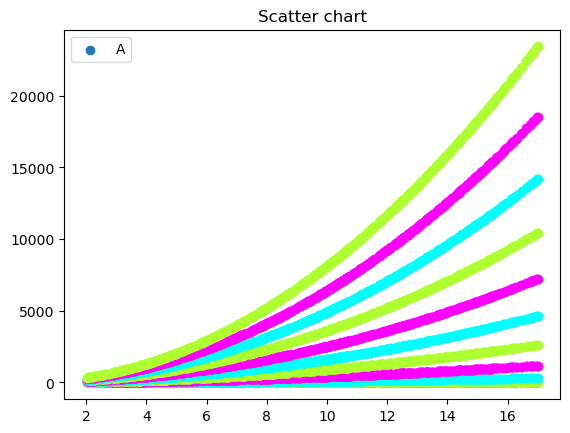

In [53]:
import itertools
x = df_D['ExpectedLOS']
y = df_D['ExpectedMortality']

plt.scatter(x, y)
plt.legend("A")
plt.title("Scatter chart")
ys = [i+x+(i*x)**2 for i in range(10)]
colors = itertools.cycle(["greenyellow", "aqua", "magenta"])
for y in ys:
    plt.scatter(x, y, color=next(colors))

In [ ]:
23.